# 1. Import the necessary analysis and visualization libraries


In [2]:
# Import analysis and visualization libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
PATH = '02 Data'

In [4]:
# Import the df_instacart dataframe

df_instacart = pd.read_pickle(os.path.join(PATH, 'Prepared Data', 'df_instacart.pkl'))

In [5]:
df_instacart.head()

,user_id,First Name,Last Name,Gender,STATE,Age(yrs),Date_of_join,No_of_dependants,Family_status,Income($),...,price_category_loc,Busiest day,Busiest days and Slowest days,Busiest_period_of_day,max_order,Loyalty_flag_loc,user_average_price,spending_flag,order_median,order_frequency_flag
0,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid_range product,Regularly busy,Second busiest day,Average orders,9.0,New customer,7.483644,Low spender,19.0,Regular customer
1,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid_range product,Regularly busy,Regularly busy,Average orders,9.0,New customer,6.085714,Low spender,19.0,Regular customer
2,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid_range product,Regularly busy,Second busiest day,Average orders,9.0,New customer,11.070000,High spender,19.0,Regular customer
3,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid_range product,Regularly busy,Regularly busy,Average orders,9.0,New customer,NaN,NaN,19.0,Regular customer
4,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid_range product,Regularly busy,Second slowest day,Average orders,9.0,New customer,NaN,NaN,19.0,Regular customer


In [6]:
df_instacart.columns

Index(['user_id', 'First Name', 'Last Name', 'Gender', 'STATE', 'Age(yrs)',
       'Date_of_join', 'No_of_dependants', 'Family_status', 'Income($)',
       'order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'product_name', 'aisle_id', 'department_id',
       'prices', 'price_category_loc', 'Busiest day',
       'Busiest days and Slowest days', 'Busiest_period_of_day', 'max_order',
       'Loyalty_flag_loc', 'user_average_price', 'spending_flag',
       'order_median', 'order_frequency_flag'],
      dtype='object')

# 3.Create a histogram of the “order_hour_of_day” column.

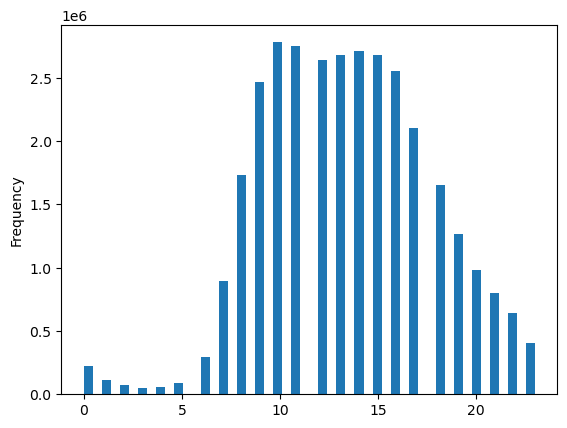

In [7]:
# A histogram of the 'order_hour_of_day'column

hist_gram = df_instacart['order_hour_of_day'].plot.hist(bins = 50)

In the above histogram, it shows that the frequency of order is high at 10 to 16. I mean from 10 am to 4 pm, most of the orders comes and at 10 am most oders comes and after that slowly it starts to decrease.

# 4.Create a bar chart from the “loyalty_flag” column.

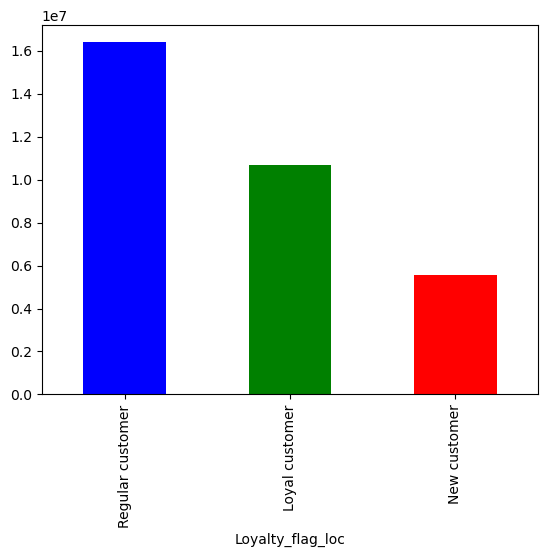

In [8]:
# A bar chart of the 'loyalty_flag'column

bar_plot = df_instacart['Loyalty_flag_loc'].value_counts().plot.bar(color = ['blue', 'green','red'])


In [20]:
# create a summary of loyalty flag
Loyalty_flag = df_instacart['Loyalty_flag_loc'].value_counts(dropna= False)

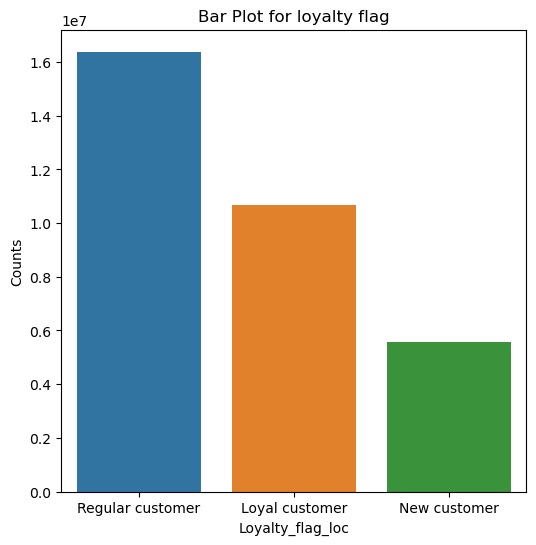

In [23]:
bar_plot = plt.figure(figsize=(6, 6))
sns.barplot(x=Loyalty_flag.index, y=Loyalty_flag.values)
plt.title('Bar Plot for loyalty flag')
plt.xlabel('Loyalty_flag_loc')
plt.ylabel('Counts')
plt.show()

# 5.Use an accurate sample for your line chart

## create a sample of 80/20

In [9]:
# create a list holding true/ false value to test np.rendom.rand()<= 0.8

dev = np.random.rand(len(df_instacart))<=0.8

In [10]:
# Store 80% of sample in dataframe big 

big = df_instacart[dev]

In [11]:
# store 20% of sample in dataframe small

small = df_instacart[~dev]

In [12]:
#check numbers of rows as your original df_instacart dataframe

len(df_instacart)


32642450

In [13]:
# check the big and small subset

len(big)+ len(small)

32642450

In [14]:
# reducing  samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day

df_2 = small[['order_hour_of_day','prices']]


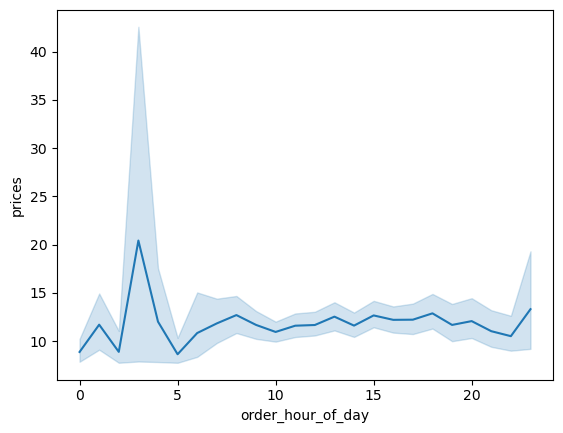

In [15]:
# create a line chart

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

There is a difference in expenditure (the “prices” column) depending on the hour of the day. 

# 6. Creating a line chart exploring the connections between age and number of dependents

In [23]:
# creating a line chart exploring the connections between age and number of dependents:

df_3 = small[['Age(yrs)','No_of_dependants']]

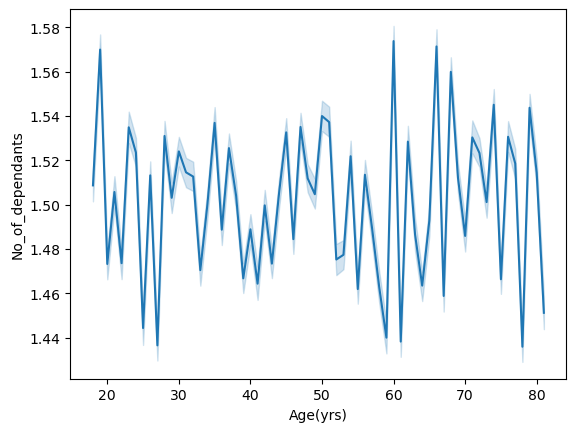

In [37]:
# create a line chart

line_2 = sns.lineplot(data = df_3, x = 'Age(yrs)',y = 'No_of_dependants')

Here we can see that, who are 20 yrs and  60 yrs have more no of dependants. And the age group between 21 to 59, have less no of dependants.

# 7. Create a scatterplot to explore whether there’s a connection between age and spending power (income).


KeyboardInterrupt: 

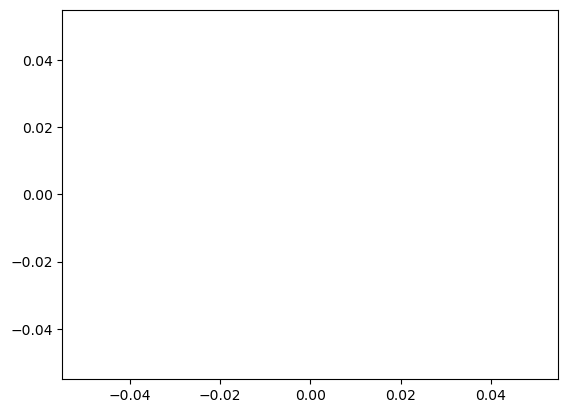

In [51]:
# create a scarrterplot to explore whether there’s a connection between age and spending power (income).

df_instacart_unique = df_instacart.drop_duplicates(subset=['Age(yrs)','Income($)','user_id']) 

scatter_plot = sns.scatterplot(x = 'Age(yrs)', y = 'Income($)',data = df_instacart)


There is a strong correalation between age and income, just as age is increasing , Income is also increasing.

In [50]:
df_instacart_unique.shape

(206209, 33)

In [40]:
df_instacart.shape
del df_instacart

In [43]:
# check the outliers in age column

df_instacart['Age(yrs)'].max()



81

In [29]:
# check the outliers in age column

df_instacart['Income($)'].max()

593901

# 8. Export your visualizations as “.png” files in your relevant project folder

In [31]:
# export the scatterplot(q.n.-7)

scatter_plot.figure.savefig(os.path.join('04 Analysis','Visualization', 'scatter_plot_age_income.png'))

In [33]:
# export the histogram(q.n.3)

hist_gram.figure.savefig(os.path.join('04 Analysis','Visualization', 'hist_gram_order_hod.png'))

In [24]:
# export the bar chart(q.n.4)

bar_plot.figure.savefig(os.path.join('04 Analysis','Visualization', 'bar_plot_loyalty_flag.png'))

In [16]:
# export the sample- line chart(q.n.5)

line.figure.savefig(os.path.join('04 Analysis','Visualization', 'line_prices_order_hod.png'))

In [38]:
# export the line chart(q.n.6)

line_2.figure.savefig(os.path.join('04 Analysis','Visualization', 'line_2_age_dependents.png'))